<a href="https://colab.research.google.com/github/LatiefDataVisionary/scikit-learn-with-indonesia-belajar/blob/main/SKLearn_13_%7C_Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SKLearn 13 | Naive Bayes Classification | Belajar Machine Learning Dasar**


Bayes' Theorem menawarkan suatu formula untuk menghitung nilai probability dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi terkait; atau sering kali dikenal dengan istilah conditional probability.

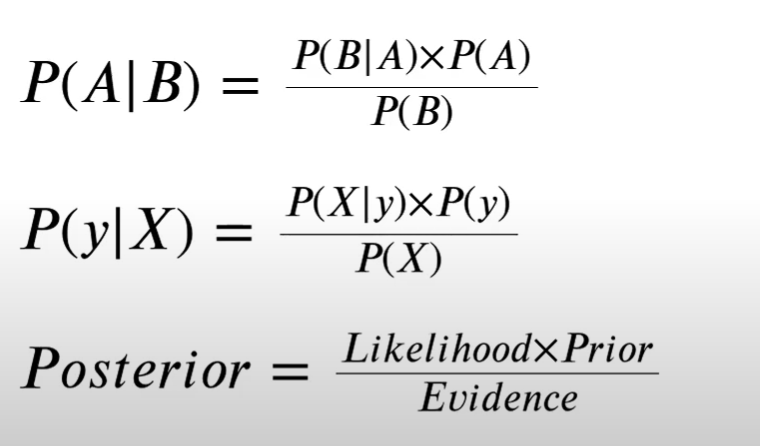

## **Pengenalan Naive Bayes Classification**

### **Studi Kasus**

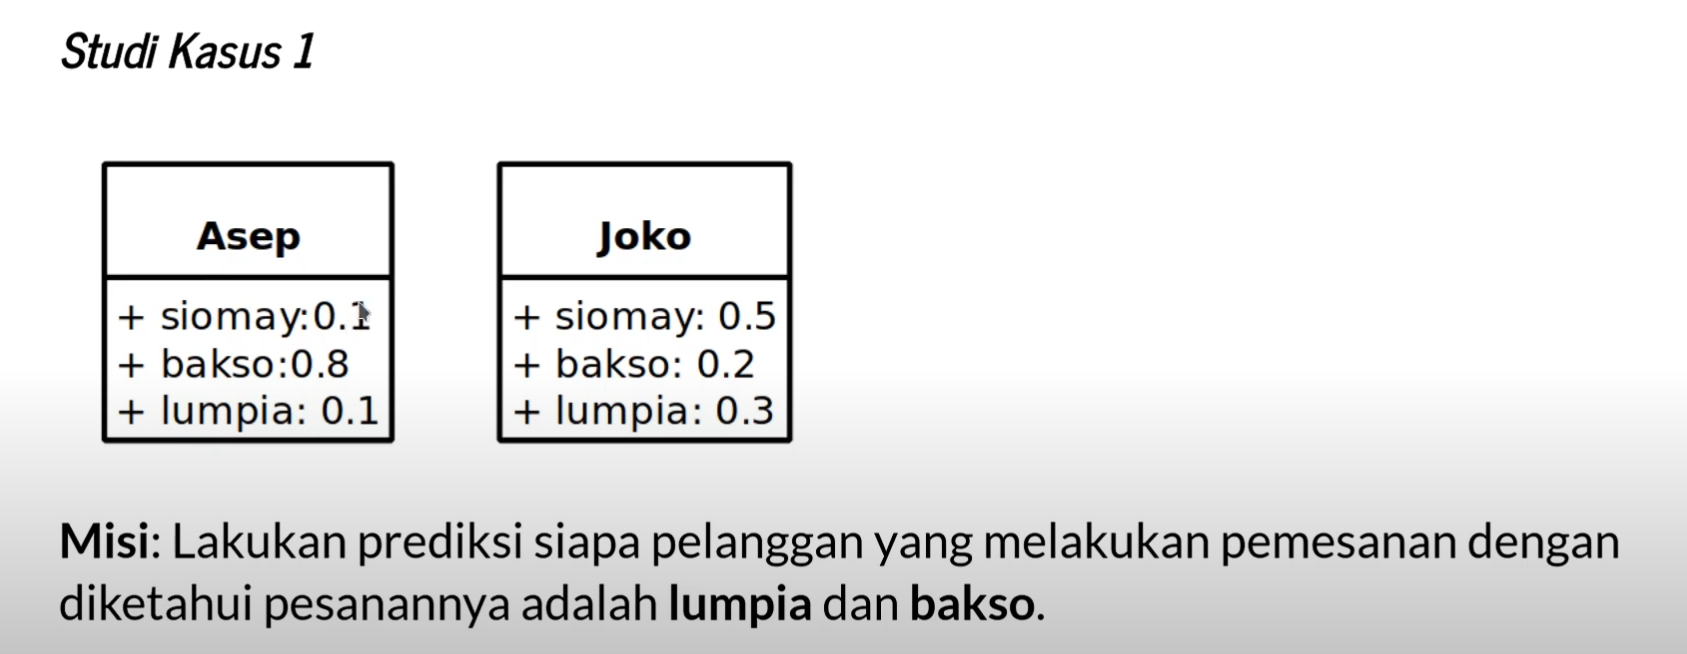

### **Prior Probability: P(y)**

- **Referensi**: https://en.wikipedia.org/wiki/Prior_probability
- `P(Asep) = 0.5`
- `P(Joko) = 0.5`

### ***Likelihood:* P(X|y)**

- Referensi: https://en.wikipedia.org/wiki/Likelihood_function

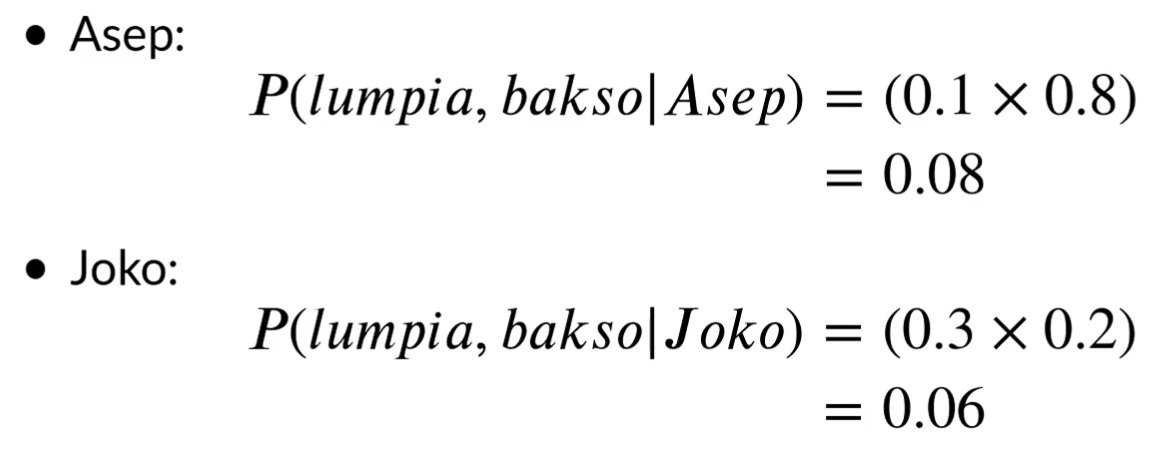

### **Evidence atau Normalizer: P(X)**

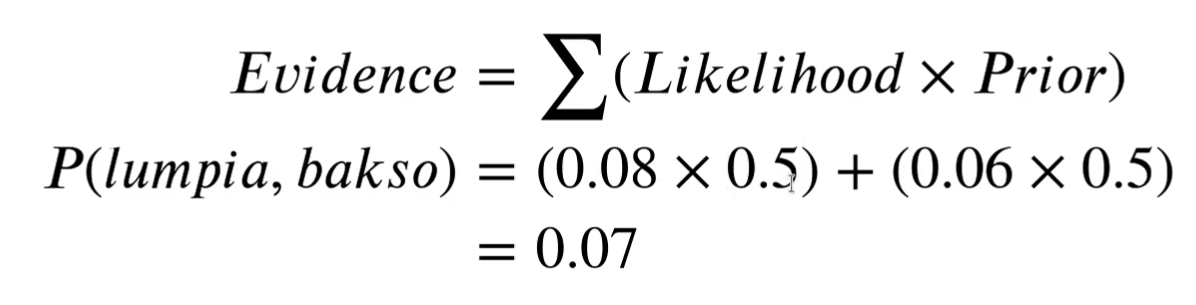

### **Posterior Probability**

- Referensi: https://en.wikipedia.org/wiki/Posterior_probability

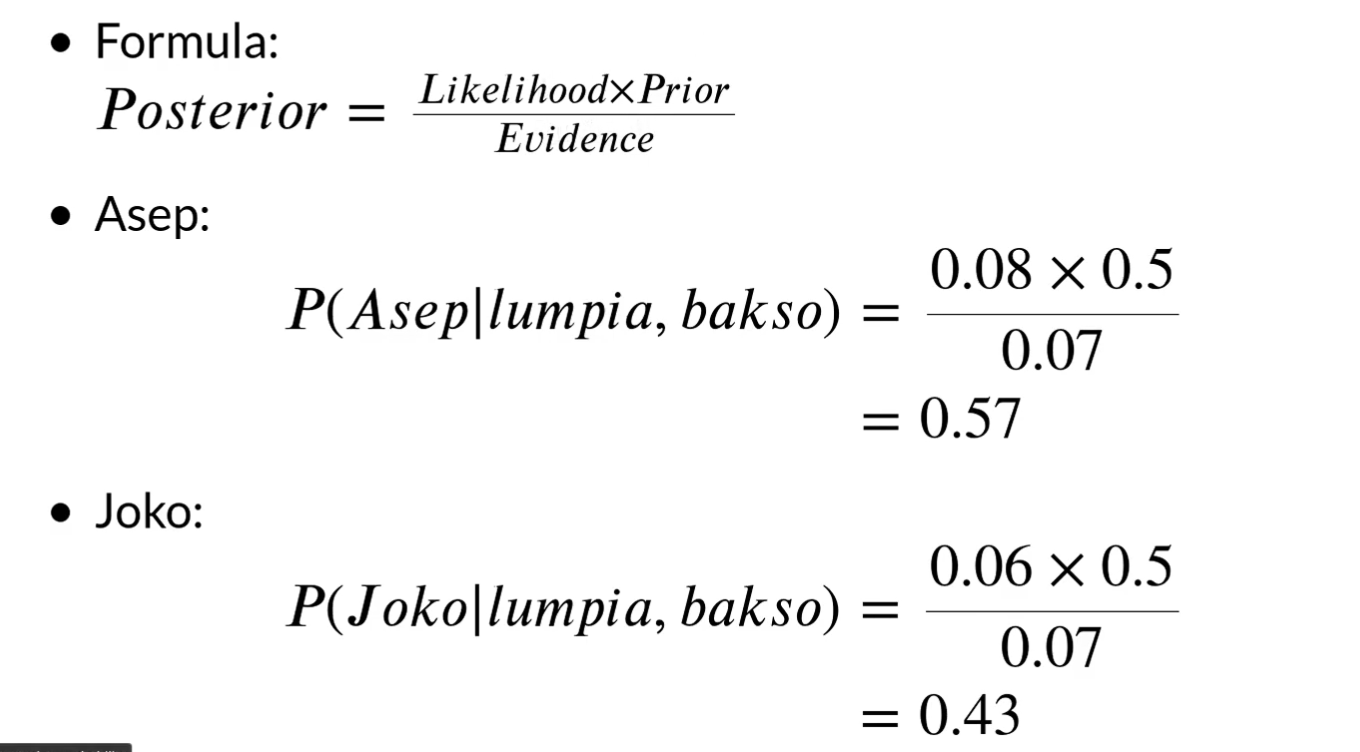

## **Mengapa disebut Naive?**

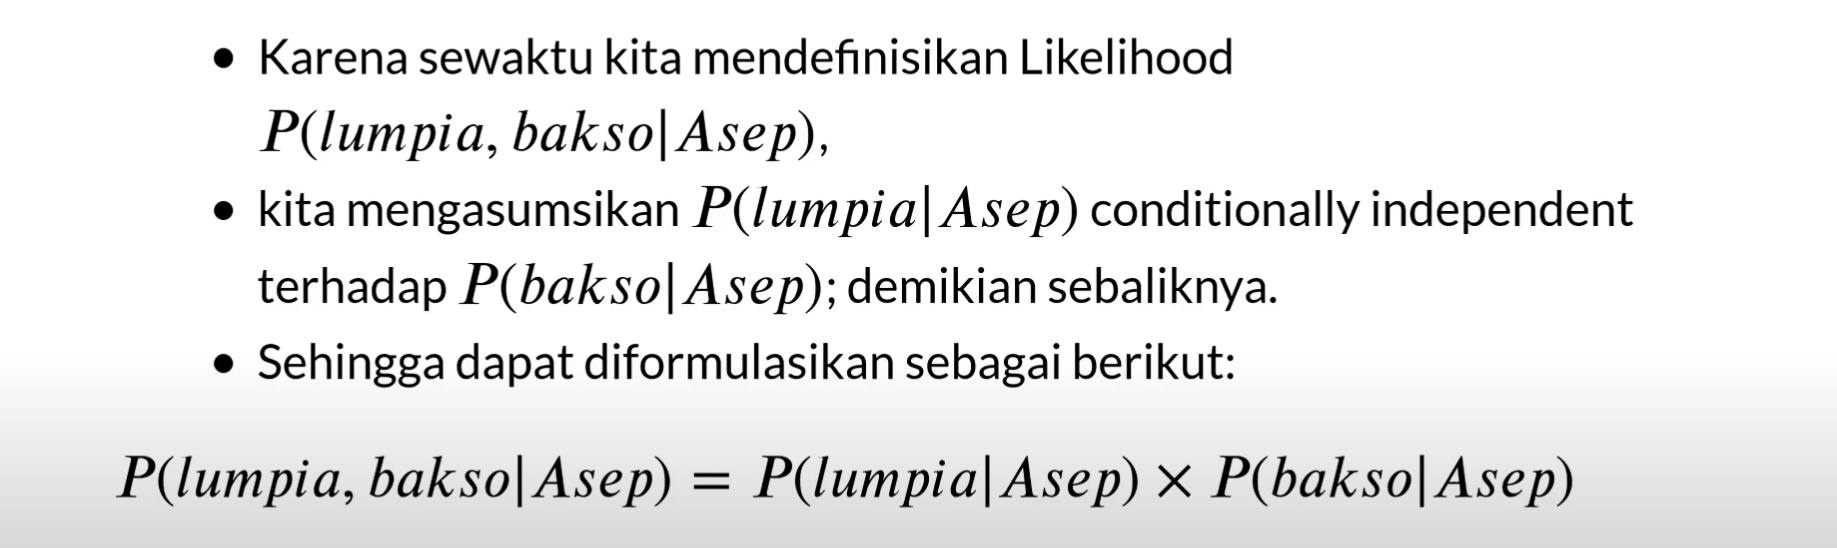

## **Dataset: Breast Cancer Wisconsin (Diagnostic)**

Referensi/Datasource: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### **Load Dataset:**

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [3]:
# metadata
breast_cancer_wisconsin_diagnostic.metadata

{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
  'Olvi Mangasarian',
  'Nick Street',
  'W. Street'],
 'intro_paper': {'ID': 230,
  'type': 'NATIVE',
  'title': 'Nuclear feature extraction for breast tumor diagnosis',
  'authors': 'W. Street, W. Wolberg, O. Mangasarian',
  'venue': 'Electronic imaging',
  'yea

In [4]:
# variable information
breast_cancer_wisconsin_diagnostic.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


ataua bisa juga mengimpor datasetnya dari sklearn

In [7]:
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

In [9]:
load_breast_cancer?

### **Training & Testing Set**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)
